In [1]:
max_max = 400

In [2]:
#!/usr/bin/python3
from sklearn.svm import OneClassSVM
import pandas as pd
import feather
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
np.random.seed(500)
import time
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

In [4]:
# from os import listdir
# from os.path import isfile, join
# dec_directory ="/home/parallels/KTH/II2202/deception_dataset/doctor/deceptive"
# genuine_directory = "/home/parallels/KTH/II2202/deception_dataset/doctor/truthful"
# deceptive_files = [f for f in listdir(dec_directory) if isfile(join(dec_directory, f))]
# genuine_files = [f for f in listdir(genuine_directory) if isfile(join(genuine_directory, f))]
# df_list = []

# for deceit in deceptive_files:
#     file_path = join( dec_directory, deceit )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=-1))


# for genuine in genuine_files:
#     file_path = join( genuine_directory, genuine )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=1))

    
# df = pd.concat(df_list, ignore_index=True)


# # df = pd.read_table("Data/YelpChi/output_review_yelpHotelData_NRYRcleaned.txt",header=None)
# # df2 = pd.read_table("Data/YelpChi/output_meta_yelpHotelData_NRYRcleaned.txt",header=None, sep=" ")
# # df['label'] =  df2[4]
# # df['label'] = df['label'].replace(['N'],1)
# # df['label'] = df['label'].replace(['Y'],-1)
# df.columns = ['review_content', 'label']


pickle_in = open("df_doctor.pickle","rb")
df = pickle.load(pickle_in)

In [5]:
df

,review_content,label,tokenized,text_final
0,"for most of my adult life, i've had self confi...",-1,"[for, most, of, my, adult, life, ,, i, 've, ha...","['adult', 'life', 'self', 'confidence', 'issue..."
1,i had an excellent experience with dr. francoi...,-1,"[i, had, an, excellent, experience, with, dr.,...","['excellent', 'experience', 'francois', 'lacom..."
2,"john keller is well-like by many, and has an e...",-1,"[john, keller, is, well-like, by, many, ,, and...","['john', 'keller', 'many', 'extraordinary', 'a..."
3,i recently went in to see doctor greyvenstein....,-1,"[i, recently, went, in, to, see, doctor, greyv...","['recently', 'go', 'see', 'doctor', 'greyvenst..."
4,dr. forrest is a fantastic pediatritian. he go...,-1,"[dr., forrest, is, a, fantastic, pediatritian,...","['forrest', 'fantastic', 'pediatritian', 'go',..."
...,...,...,...,...
551,i would recommend dr. hasell. i had a ba on j...,1,"[i, would, recommend, dr., hasell, ., i, had, ...","['would', 'recommend', 'hasell', 'ba', 'july',..."
552,i had breast augmentation done by doctor hasel...,1,"[i, had, breast, augmentation, done, by, docto...","['breast', 'augmentation', 'do', 'doctor', 'ha..."
553,dr. richards performed the s-lift on me about ...,1,"[dr., richards, performed, the, s-lift, on, me...","['richards', 'perform', 'week', 'ago', 'alread..."
554,dr. ayling was one of the best doctors i've ev...,1,"[dr., ayling, was, one, of, the, best, doctors...","['ayling', 'one', 'best', 'doctor', 'ever', 'p..."


In [6]:
pos=0 
neg = 0

for x in df['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  356  positive: 200 total 556 percent deceptive 64.02877697841727


In [7]:
#file_path = '/home/parallels/KTH/II2202/Data/YelpNYC/database_feather.feather'
#df = pd.read_feather(file_path, columns=None, use_threads=True)

In [8]:
df.dtypes

review_content    object
label              int64
tokenized         object
text_final        object
dtype: object

In [9]:
df.describe()

,label
count,556.000000
mean,-0.280576
std,0.960696
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


In [10]:
# # Step - a : Remove blank rows if any.
# df['review_content'].dropna(inplace=True)

In [11]:
# # Step - b : Change all the text to lower case
# df['review_content'] = [entry.lower() for entry in df['review_content']]

In [12]:
# # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
# # tokenized = []
# # for index,entry in enumerate(genuine['review_content']): 
# #     genuine.loc[index,'tokenized'] = [word_tokenize(entry)]
# #     percent = index/len(genuine)*100
# #     print('percent done [%d%%]\r'%percent, end="")
# df['tokenized']= [word_tokenize(entry) for entry in df['review_content']]

In [13]:
# # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
# final_text = [None]*len(df['tokenized'])
# for index,entry in enumerate(df['tokenized']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     percent = float(index/len(df['tokenized'])*100)

#     print('percent done [%f%%]\r'%percent, end="")
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df.loc[index,'text_final'] = str(Final_words)
#     final_text[index]=(Final_words)
    


In [14]:
# #to save the preporcessed list

# pickle_out = open("df_doctor.pickle","wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [15]:
df

,review_content,label,tokenized,text_final
0,"for most of my adult life, i've had self confi...",-1,"[for, most, of, my, adult, life, ,, i, 've, ha...","['adult', 'life', 'self', 'confidence', 'issue..."
1,i had an excellent experience with dr. francoi...,-1,"[i, had, an, excellent, experience, with, dr.,...","['excellent', 'experience', 'francois', 'lacom..."
2,"john keller is well-like by many, and has an e...",-1,"[john, keller, is, well-like, by, many, ,, and...","['john', 'keller', 'many', 'extraordinary', 'a..."
3,i recently went in to see doctor greyvenstein....,-1,"[i, recently, went, in, to, see, doctor, greyv...","['recently', 'go', 'see', 'doctor', 'greyvenst..."
4,dr. forrest is a fantastic pediatritian. he go...,-1,"[dr., forrest, is, a, fantastic, pediatritian,...","['forrest', 'fantastic', 'pediatritian', 'go',..."
...,...,...,...,...
551,i would recommend dr. hasell. i had a ba on j...,1,"[i, would, recommend, dr., hasell, ., i, had, ...","['would', 'recommend', 'hasell', 'ba', 'july',..."
552,i had breast augmentation done by doctor hasel...,1,"[i, had, breast, augmentation, done, by, docto...","['breast', 'augmentation', 'do', 'doctor', 'ha..."
553,dr. richards performed the s-lift on me about ...,1,"[dr., richards, performed, the, s-lift, on, me...","['richards', 'perform', 'week', 'ago', 'alread..."
554,dr. ayling was one of the best doctors i've ev...,1,"[dr., ayling, was, one, of, the, best, doctors...","['ayling', 'one', 'best', 'doctor', 'ever', 'p..."


In [16]:
x = df['text_final'].values.reshape(-1,1)
y = df['label'].values.reshape(-1,1)
y.shape

(556, 1)

In [17]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy='majority')
#oversample = RandomOverSampler(sampling_strategy='minority')
X_under, y_under = undersample.fit_resample(x, y)
#X_over, y_over = oversample.fit_resample(X, df['label'])

In [18]:
d = {'text_final':X_under[:,0],'label':y_under[:,]}
dfu = pd.DataFrame(d)

In [19]:
dfu

,text_final,label
0,"['ernst', 'greyvenstein', 'amaze', 'really', '...",-1
1,"['loyal', 'satisfied', 'patient', 'benoit', 'l...",-1
2,"['forrest', 'exceptional', 'pediatric', 'plast...",-1
3,"['adult', 'life', 'self', 'confidence', 'issue...",-1
4,"['physicians', 'office', 'take', 'note', 'broa...",-1
...,...,...
395,"['would', 'recommend', 'hasell', 'ba', 'july',...",1
396,"['breast', 'augmentation', 'do', 'doctor', 'ha...",1
397,"['richards', 'perform', 'week', 'ago', 'alread...",1
398,"['ayling', 'one', 'best', 'doctor', 'ever', 'p...",1


In [20]:
pos=0 
neg = 0
for x in dfu['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  200  positive: 200 total 400 percent deceptive 50.0


In [21]:
Train_X_oc_all, Test_X_oc_all = model_selection.train_test_split(dfu[['label','text_final']],test_size=0.3,stratify=dfu['label'])

In [22]:
# check test genuine/deceptive
pos=0 
neg = 0

for x in Test_X_oc_all['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  60  positive: 60 total 120 percent deceptive 50.0


In [23]:
# split using genuine
Train_X, Test_X = model_selection.train_test_split((df.loc[(df['label'] == 1)]).text_final,test_size=0.3)


In [24]:
len(Train_X)

140

In [25]:
#split using deceptive
Train_X_dec, Test_X_dec = model_selection.train_test_split((Train_X_oc_all.loc[(dfu['label'] == -1)]).text_final,test_size=0.3)

In [26]:
Tfidf_vect = TfidfVectorizer(max_features=max_max)        
Tfidf_vect.fit(df['text_final'])

TfidfVectorizer(max_features=400)

In [27]:
#vectorizing genuine data
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [28]:
# vectorizing deceptive data
Train_X_Tfidf_dec = Tfidf_vect.transform(Train_X_dec)
Test_X_Tfidf_dec = Tfidf_vect.transform(Test_X_oc_all['text_final'])

In [29]:
# vectorizing all data
Test_X_Tfidf_all = Tfidf_vect.transform(df['text_final'])

In [30]:
Train_X_Tfidf

<140x400 sparse matrix of type '<class 'numpy.float64'>'
	with 3352 stored elements in Compressed Sparse Row format>

In [31]:
# fit the training dataset on the classifier using [deceptive]
start_time = time.time()

clf_dec = OneClassSVM(gamma='auto', kernel='rbf', degree=5).fit(Train_X_Tfidf_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 0.007214069366455078


In [32]:
# predict using deceptive
start_time = time.time()
predictions_oneclass_dec = clf_dec.predict(Test_X_Tfidf_dec)
#print(predictions_oneclass_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

elapsed_time 0.0031309127807617188


In [33]:
# deceptive predict count
pos=0 
neg = 0

for x in predictions_oneclass_dec:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)       

negative:  98  positive: 22


In [34]:
cf_matrix=confusion_matrix(Test_X_oc_all['label'], predictions_oneclass_dec*-1)
metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted',zero_division=0)
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_dec*-1, Test_X_oc_all['label'], normalize=True))
print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2])
#print(metrics.f1_score(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted'))
#sns.heatmap(cf_matrix, annot=True)

Accuracy Score ->  0.6166666666666667
percision:  0.6948051948051948  recall:  0.6166666666666667  fscore:  0.5739425748687866


<AxesSubplot:>

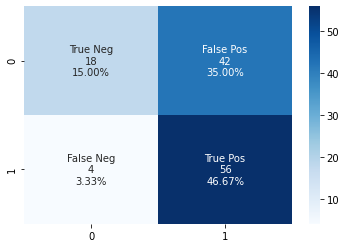

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [36]:
# fit the training dataset on the classifier using [genuine]
start_time = time.time()

clf_gen = OneClassSVM(gamma='auto', kernel='poly', degree=1).fit(Train_X_Tfidf)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 0.007305145263671875


In [37]:
# predict using [genuine]
start_time = time.time()
predictions_oneclass_gen = clf_gen.predict(Test_X_Tfidf_dec)
#print(predictions_oneclass_gen)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

elapsed_time 0.0035991668701171875


In [38]:
# count of prediction using [genuine]
pos=0 
neg = 0

for x in predictions_oneclass_gen:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)   

negative:  80  positive: 40


In [39]:
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_gen, Test_X_oc_all['label'], normalize=True))

Accuracy Score ->  0.5833333333333334


In [40]:
# # to save the classifier model

# pickle_out = open("clf_oneclass.pickle","wb")
# pickle.dump(clf, pickle_out)
# pickle_out.close()

In [58]:
X_train_all, X_validation_all, Y_train_all, Y_validation_all = train_test_split(Tfidf_vect.transform(dfu['text_final']), dfu['label'], test_size=0.65, random_state=1,stratify=dfu['label'] )

In [59]:
print(len(dfu['text_final']),len(Y_train_all))

400 140


In [60]:
pos=0 
neg = 0
for x in Y_train_all:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  70  positive: 70 total 140 percent deceptive 50.0


In [61]:
# classifier checker

# your code
models = []
#models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'),[],0,0])
#models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis(),[],0,0])
#models.append(['K Nearest Neighbor', KNeighborsClassifier(),[],0,0])
#models.append(['Decesion Tree Classifier', DecisionTreeClassifier(),[],0,0])
#models.append(['Gaussien Naive Bayes', GaussianNB(),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='rbf'),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='poly'),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='linear'),[],0,0])
#models.append(['Random Forest', RandomForestClassifier(max_depth = 1000,random_state=1),[],0,0])

models = np.array(models,dtype=object)

for i in range(len(models)):
    start_time = time.time()
    #kfold = StratifiedKFold(n_splits=1, random_state=1, shuffle=True)
    cv_results = cross_val_score(models[i,1], X_train_all, Y_train_all, scoring='accuracy')
    models[i,2] = cv_results
    models[i,3] = cv_results.mean()
    models[i,4] = cv_results.std()
    elapsed_time = time.time() - start_time
    print('%s: %f (%f) elapsed time: %f' % (models[i,0], models[i,3], models[i,4],elapsed_time))
    
    

best_model= models[np.argmax(models[:,3]),:]
print("the best model performer is: ", best_model[0])

Support Vector Machine: 0.792857 (0.069253) elapsed time: 0.050667
Support Vector Machine: 0.685714 (0.041650) elapsed time: 0.040733
Support Vector Machine: 0.771429 (0.073540) elapsed time: 0.102068
the best model performer is:  Support Vector Machine


In [62]:
clf_model=SVC(gamma='auto',kernel='linear',degree=2).fit(X_train_all, Y_train_all)

In [63]:
result=clf_model.predict(X_validation_all)

In [64]:
pos=0 
neg = 0
for x in result:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  123  positive: 137 total 260 percent deceptive 47.30769230769231


In [65]:
print("Accuracy Score -> ",accuracy_score(result, Y_validation_all, normalize=True))
metrics_result = precision_recall_fscore_support(Y_validation_all, result, average='binary',zero_division=0)
print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2], '\n') 

Accuracy Score ->  0.7730769230769231
percision:  0.7591240875912408  recall:  0.8  fscore:  0.7790262172284643 



In [49]:
# fit the training dataset on the classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [0,1,2,3]
classifiers = []
for kern in kernels:
    start_time = time.time()
    if kern == 'poly':
        for deg in degrees:
            start_time = time.time()
            clf_result = OneClassSVM( kernel=kern, degree=deg).fit(Train_X_Tfidf)
            elapsed_time = time.time() - start_time
            classifiers.append([kern,deg,clf_result,elapsed_time])
            print('kernel used: ' , kern, ' degree used: ' , deg, ' elapsed_time:' , elapsed_time)
            
    else:
        clf_result = OneClassSVM(gamma='auto', kernel=kern).fit(Train_X_Tfidf)
        elapsed_time = time.time() - start_time
        classifiers.append([kern,0,clf_result,elapsed_time])
        print('kernel used: ' , kern, ' elapsed_time: ' , elapsed_time)

# predict the labels on validation dataset

kernel used:  linear  elapsed_time:  0.006752729415893555
kernel used:  poly  degree used:  0  elapsed_time: 0.00466156005859375
kernel used:  poly  degree used:  1  elapsed_time: 0.006789207458496094
kernel used:  poly  degree used:  2  elapsed_time: 0.007994651794433594
kernel used:  poly  degree used:  3  elapsed_time: 0.007224321365356445
kernel used:  rbf  elapsed_time:  0.005223274230957031
kernel used:  sigmoid  elapsed_time:  0.0044765472412109375


In [50]:
clas_result = []
for clas in classifiers:
    start_time = time.time()
    predict_result = clas[2].predict(Test_X_Tfidf_dec)
    elapsed_time = time.time() - start_time
    clas_result.append([clas[0],clas[1],clas[2],predict_result])
    acc = accuracy_score(predict_result*1, Test_X_oc_all['label'], normalize=True)
    metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predict_result*1, average='binary',zero_division=0)
    print('kernel used: ' , clas[0], ' degree used:' , clas[1], ' elapsed_time: ' , elapsed_time, ' accuracy: ', acc)
    print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2], '\n')  
# predict the labels on validation dataset

kernel used:  linear  degree used: 0  elapsed_time:  0.0030939579010009766  accuracy:  0.575
percision:  0.6153846153846154  recall:  0.4  fscore:  0.4848484848484849 

kernel used:  poly  degree used: 0  elapsed_time:  0.0023670196533203125  accuracy:  0.5
percision:  0.0  recall:  0.0  fscore:  0.0 

kernel used:  poly  degree used: 1  elapsed_time:  0.0027616024017333984  accuracy:  0.575
percision:  0.6153846153846154  recall:  0.4  fscore:  0.4848484848484849 

kernel used:  poly  degree used: 2  elapsed_time:  0.004880428314208984  accuracy:  0.675
percision:  0.9565217391304348  recall:  0.36666666666666664  fscore:  0.5301204819277108 

kernel used:  poly  degree used: 3  elapsed_time:  0.004916191101074219  accuracy:  0.5916666666666667
percision:  1.0  recall:  0.18333333333333332  fscore:  0.30985915492957744 

kernel used:  rbf  degree used: 0  elapsed_time:  0.002614259719848633  accuracy:  0.575
percision:  0.6216216216216216  recall:  0.38333333333333336  fscore:  0.4742

<AxesSubplot:>

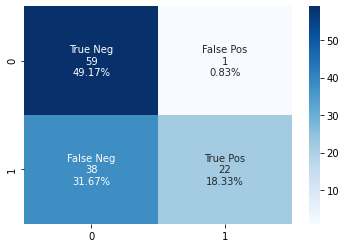

In [66]:
clf_result = OneClassSVM( kernel='poly', degree=2).fit(Train_X_Tfidf)
predict_result = clf_result.predict(Test_X_Tfidf_dec)

cf_matrix=confusion_matrix(Test_X_oc_all['label'], predict_result*1)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
